Import bibliotekii, wczytanie plików.
Dodanie kolumny stanu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
restaurants = pd.read_csv('restaurants.csv')
menu = pd.read_csv('restaurant-menus.csv')
merged = restaurants.merge(menu, how='left', left_on='id', right_on='restaurant_id' , sort=False, suffixes=('_rest', '_menu'))
restaurants['state'] = [str(a).replace(str(b), '').strip()[-3:-1] for a, b in zip(restaurants['full_address'], restaurants['zip_code'])]
restaurants.loc[restaurants['zip_code'].str.len() == 2, ['zip_code']] = '00000'
restaurants.loc[restaurants['zip_code'].isin(['75070']), ['state']] = 'TX'
restaurants.loc[restaurants['state'].isin([', ','an','U']),['state']] = 'PR'




Import modułu do geolokalizacji (musiałam pobrać dodatkowo przez terminal, komenda jest w dokumentacji Anacondy).  

Funkcja pobierająca dane o stanie na podstawie długości i szerokości geograficznej i przypisująca stan do kolumny "state".

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
def state_func(row):
    coord = f"{row['lat']}, {row['lng']}"
    location = geolocator.reverse(coord, exactly_one=True)    
    address = location.raw['address']
    state = address.get('state','')
    row['state'] = state
    return row

Zastosowanie funkcji na kopii dataframe'u. Aktualizacja dataframe o nowe dane.
(proces trwa ok. 2 min)

In [4]:
restaurants1 = restaurants[restaurants['state']==''].apply(state_func, axis=1)
restaurants.update(restaurants1)

Nowo dodane stany były w pełnej formie, dlatego zmieniam wszystkie skróty na pełne nazwy w celu ujednolicenia danych.
Moim zdaniem tak się łatwiej pracuje.

In [5]:
restaurants.loc[restaurants['state']=='AL', 'state']='Alabama'
restaurants.loc[restaurants['state']=='WY', 'state']='Wyoming'
restaurants.loc[restaurants['state']=='WI', 'state']='Wisconsin'
restaurants.loc[restaurants['state']=='MN', 'state']='Minnesota'
restaurants.loc[restaurants['state']=='IL', 'state']='Illinois'
restaurants.loc[restaurants['state']=='WV', 'state']='West Virginia'
restaurants.loc[restaurants['state']=='OH', 'state']='Ohio'
restaurants.loc[restaurants['state']=='WA', 'state']='Washington'
restaurants.loc[restaurants['state']=='OR', 'state']='Oregon'
restaurants.loc[restaurants['state']=='PR', 'state']='Puerto Rico'
restaurants.loc[restaurants['state']=='ID', 'state']='Idaho'
restaurants.loc[restaurants['state']=='VA', 'state']='Virginia'
restaurants.loc[restaurants['state']=='DC', 'state']='District of Columbia'
restaurants.loc[restaurants['state']=='MD', 'state']='Maryland'
restaurants.loc[restaurants['state']=='TN', 'state']='Tennessee'
restaurants.loc[restaurants['state']=='VT', 'state']='Vermont'
restaurants.loc[restaurants['state']=='UT', 'state']='Utah'
restaurants.loc[restaurants['state']=='TX', 'state']='Texas'
restaurants.loc[restaurants['state']=='AM', 'state']='Puerto Rico'

Śledztwo googlowe wykazało, ze są to same teksańskie restauracje.

In [6]:
restaurants.loc[restaurants['state']=='', 'state']='Texas'

In [7]:
restaurants['state'].unique()

array(['Alabama', 'Wyoming', 'Wisconsin', 'Minnesota', 'Illinois',
       'West Virginia', 'Ohio', 'Washington', 'Oregon', 'Puerto Rico',
       'Idaho', 'Virginia', 'District of Columbia', 'Maryland',
       'Tennessee', 'Vermont', 'Utah', 'Texas'], dtype=object)

In [8]:
#Usunięcie NaN 
veg = restaurants[restaurants['category'].notna()]

In [9]:
vege = veg[veg['category'].str.contains('Veg')]

Restauracje wegańskie i wegetariańskie

In [10]:
vege

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state
7,8.0,26.0,Little India,NaN,NaN,"Vegetarian, Asian, Asian Fusion, Chinese, Indi...",$,"2236 Highland Ave, Birmingham, AL, 35205",35205,33.502259,-86.790298,Alabama
9,10.0,51.0,Cajun Bistro Express,NaN,NaN,"Desserts, Vegetarian, Coffee and Tea",$,"1515 Pearson Ave SW, Birmingham, AL, 35211",35211,33.486840,-86.856300,Alabama
14,15.0,139.0,The Imperial Indian,NaN,NaN,"Indian, Vegetarian, Pakistani, Chicken, Indian...",NaN,"1024 20th Street South Unit 101, Birmingham, A...",35205,33.500900,-86.796900,Alabama
18,19.0,30.0,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,Alabama
37,38.0,61.0,CHOP N FRESH,4.8,39.0,"Salads, Vegetarian, Bowls",$,"291 Rele Street, Mountain Brook, AL, 35223",35223,33.486040,-86.773660,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...
40217,40218.0,61.0,Anthem,4.6,43.0,"American, Salads, Vegetarian, Healthy, Vegan, ...",$$,"91 Rainey Street ,STE 120, Austin, TX, 78701",78701,30.260303,-97.737669,Texas
40219,40220.0,59.0,Le Bleu (Research Blvd),4.9,175.0,"Vietnamese, Noodles, Healthy, Family Friendly,...",$,"9070 Research blvd #303, Austin, TX, 78757",78757,30.372124,-97.727290,Texas
40221,40222.0,57.0,Clay Pit (Guadalupe St),4.7,408.0,"Comfort Food, Indian, Family Meals, Vegan, Veg...",$,"1601 Guadalupe St, Austin, TX, 78701",78701,30.279008,-97.742405,Texas
40223,40224.0,53.0,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,Texas


Wyodrębnionych zostało 3043 rekordów

In [11]:
vege.count()

id              3043
position        3043
name            3043
score           1789
ratings         1789
category        3043
price_range     2185
full_address    3026
zip_code        3026
lat             3043
lng             3043
state           3043
dtype: int64

In [12]:
vege['state'].unique()

array(['Alabama', 'Wyoming', 'Wisconsin', 'Illinois', 'West Virginia',
       'Washington', 'Oregon', 'Idaho', 'Virginia',
       'District of Columbia', 'Maryland', 'Tennessee', 'Vermont', 'Utah',
       'Puerto Rico', 'Texas'], dtype=object)

Suma restauracji, w których są dania z kategorii "vege" w poszczególnych stanach

In [13]:
vegsum = pd.pivot_table(vege, index='state', values='id', aggfunc=len)

In [14]:
vegsum = vegsum.rename(columns={'id': 'Total restaurants with veg'})

In [15]:
vegsum.reset_index(inplace=True)

In [16]:
vegsum

,state,Total restaurants with veg
0,Alabama,69
1,District of Columbia,183
2,Idaho,1
3,Illinois,9
4,Maryland,111
5,Oregon,121
6,Puerto Rico,11
7,Tennessee,1
8,Texas,558
9,Utah,219


Ile restauracji jest ogólnie w poszczególnych stanach (punkt odniesienia)

In [17]:
totalres = pd.pivot_table(restaurants, index='state', values='id', aggfunc=len)

In [18]:
totalres = totalres.rename(columns={'id': 'Total restaurants'})

In [19]:
totalres

,Total restaurants
state,
Alabama,1114
District of Columbia,1517
Idaho,27
Illinois,204
Maryland,897
Minnesota,43
Ohio,15
Oregon,1031
Puerto Rico,220


In [19]:
sumresveg = totalres.merge(vegsum, how='outer', on = 'state')

In [20]:
sumresveg = sumresveg.fillna(0)

In [21]:
sumresveg

,state,Total restaurants,Total restaurants with veg
0,Alabama,1114,69.0
1,District of Columbia,1517,183.0
2,Idaho,27,1.0
3,Illinois,204,9.0
4,Maryland,897,111.0
5,Minnesota,43,0.0
6,Ohio,15,0.0
7,Oregon,1031,121.0
8,Puerto Rico,220,11.0
9,Tennessee,42,1.0


Ile jest procentowo restauracji wege w poszczególnych stanach:

In [22]:
sumresveg['veg restaurants %'] = sumresveg['Total restaurants with veg'] / sumresveg['Total restaurants'] * 100
sumresveg = sumresveg.round(2)
#sumresveg.reset_index(inplace=True)
sumresveg

,state,Total restaurants,Total restaurants with veg,veg restaurants %
0,Alabama,1114,69.0,6.19
1,District of Columbia,1517,183.0,12.06
2,Idaho,27,1.0,3.70
3,Illinois,204,9.0,4.41
4,Maryland,897,111.0,12.37
5,Minnesota,43,0.0,0.00
6,Ohio,15,0.0,0.00
7,Oregon,1031,121.0,11.74
8,Puerto Rico,220,11.0,5.00
9,Tennessee,42,1.0,2.38


Przygotowanie danych do wykresu

In [58]:
vegtoplot = sumresveg[['state','Total restaurants', 'Total restaurants with veg']]

Taki tam wykres, myślę jaki by tu lepiej pasował

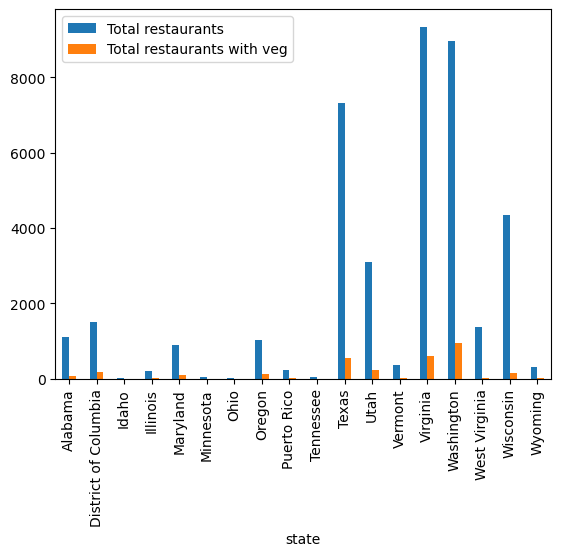

In [59]:
vegtoplot.plot(x="state", kind = 'bar', mark_right=True);

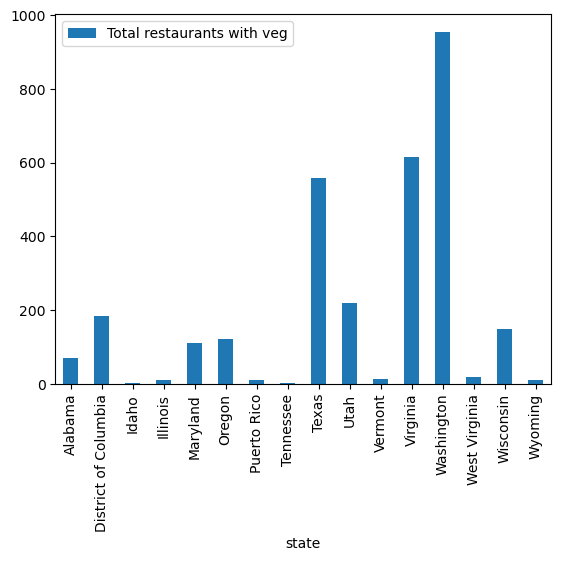

In [60]:
vegsum.plot(kind='bar', x='state', y='Total restaurants with veg')
plt.show()

In [61]:
vegpr = vege.value_counts('price_range').rename_axis('price_range').to_frame('total')
vegpr = vegpr.reset_index()
vegpr['sum'] = vegpr['total'].sum()
vegpr['sum'] = vegpr['total'] / vegpr['sum']*100
vegpr = vegpr.round(2)
vegpr

,price_range,total,sum
0,$,1571,71.90
1,$$,604,27.64
2,$$$,9,0.41
3,$$$$,1,0.05


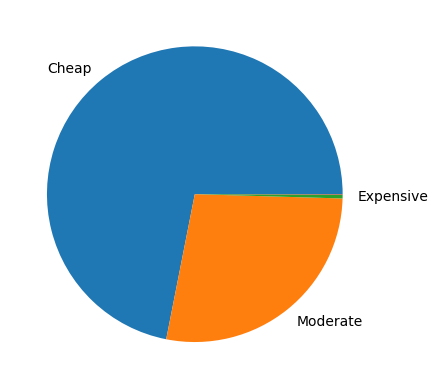

In [62]:
label = ['Cheap', 'Moderate', 'Expensive', '']
plt.pie(vegpr['sum'], labels=label)
plt.show()

Co nam dają powyzsze informacje? Jeśli chcemy otworzyć restaurację zrównowazoną ze zdrowymi daniami, to warto przyjrzeć się potencjalnie stanom, w których jest większy procent restauracji wegetariańskich i wegańskich.  

Przyczyna jest prosta: restauracja zdrowa powinna mieć dania kuchni roślinnej w swoim menu, dlatego siłą rzeczy powinna znajdować się w tej kategorii.
Stany, które przy stosunkowo duzej ilości danych (powyzej 1000 rekordów), mają powyzej 10% restauracji z opcjami wege, to: District of Columbia (Washington DC, 12,06%), Oregon (11,74%), Washington (10,65%).  

Jeśli chodzi o ceny w tych restauracjach, to jest znaczna przewaga restauracji tanich - 71,90% przy 27,64% restauracji o umiarkowanych cenach.  

Porównując z wynikami dla całości -> dla całości mamy 72,62% restauracji tanich przy 26,89% umiarkowanych (stosunek drogich restauracji do pozostałych jest niemal taki samy). Róznica jest mała, ale mozna stwierdzić, ze przy restauracjach wege jest odrobinę większy stosunek restauracji umiarkowanych do całości.

In [ ]:
Informacje odnoście ocen restauracji Vege

In [26]:
vege.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043 entries, 7 to 40225
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3043 non-null   float64
 1   position      3043 non-null   float64
 2   name          3043 non-null   object 
 3   score         1789 non-null   float64
 4   ratings       1789 non-null   float64
 5   category      3043 non-null   object 
 6   price_range   2185 non-null   object 
 7   full_address  3026 non-null   object 
 8   zip_code      3026 non-null   object 
 9   lat           3043 non-null   float64
 10  lng           3043 non-null   float64
 11  state         3043 non-null   object 
dtypes: float64(6), object(6)
memory usage: 309.1+ KB


In [23]:
score=vege.groupby('score')['id'].count()# informacja o tym ile reatauracji ma ocene od 2.3 do 5.0
score

score
2.3      1
2.7      3
2.8      1
2.9      2
3.1      1
3.3      2
3.4      7
3.5      7
3.6      6
3.7      8
3.8     10
3.9     17
4.0     17
4.1     27
4.2     58
4.3     62
4.4    102
4.5    191
4.6    271
4.7    368
4.8    391
4.9    200
5.0     37
Name: id, dtype: int64

In [28]:
scoresum=vege.groupby('score')['id'].count().sum()# informacja o tym ile reatauracji ma ocene od 1.3 do 5.0
scoresum

1789

In [ ]:
Wnioski: restauracje vege są relatywnie wysoko oceniane. 
Na 1789 az 1724 (96 procent) ma oceny wyższe równe 4.0, a 1458 (81procent) ocene wyższą równą 4.5.
    

In [33]:
ratings=vege.groupby('ratings')['id'].count()# informacja o tym ile ocen mają poszczególne restauracje 
ratings

ratings
10.0     34
11.0     31
12.0     29
13.0     39
14.0     27
         ..
433.0     1
442.0     1
445.0     1
496.0     1
500.0     6
Name: id, Length: 244, dtype: int64

In [44]:
ratings_lastten=vege.groupby('ratings')['id'].count().tail(25)# informacja o tym ile ocen mają ostatnie 25 najczęściej oceniane restauracje 
ratings_lastten

ratings
294.0    1
302.0    1
303.0    1
304.0    1
314.0    1
319.0    1
325.0    2
334.0    1
345.0    1
354.0    1
356.0    1
357.0    1
361.0    1
365.0    1
367.0    1
379.0    1
392.0    1
408.0    2
425.0    1
431.0    1
433.0    1
442.0    1
445.0    1
496.0    1
500.0    6
Name: id, dtype: int64

In [34]:
ratingssum=vege.groupby('ratings')['id'].count().sum()# informacja o tym ile ocen mają poszczególne restauracje. Sprawdzenie sumy
ratingssum

1789

In [ ]:
Wnioski 6 restauracji otrzymało po 500 ocen, a 25 resturacji między 302 a 496.
Ogólnie można powiedzieć że wszystkie vege restauracje są uczęszczane bo są oceniane :D
Najmniej bo 10 ocen ma 34 restauracje.

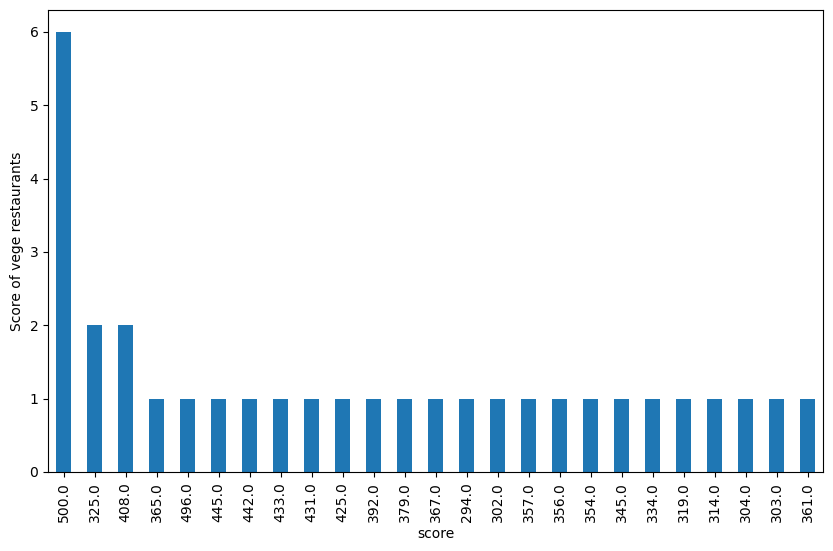

In [54]:
ratings_lastten=vege.groupby('ratings')['id'].count().tail(25).sort_values(ascending=False)\ #nic nie wniosi ten wykres
.plot(kind='bar', figsize=(10,6), ylabel="Score of vege restaurants", xlabel="score");

In [48]:
ratings_score_vege =vege.groupby(['ratings', 'score'])['id'].count() #nie wiem czemu po połączeniu nie pokazuje wszytskiego. 
                                                #Chiałam uzyskac informację otym jak ilość ocen przekłada sie na jakość oceny
ratings_score_vege

ratings  score
10.0     2.7      1
         2.8      1
         3.4      1
         3.6      1
         3.9      1
                 ..
496.0    4.7      1
500.0    4.5      1
         4.7      2
         4.8      1
         4.9      2
Name: id, Length: 929, dtype: int64

In [49]:
vege_copy = vege[['name', 'category', 'state', 'score', 'ratings']].copy() 
#kopia tabeli vege po to żeby pokazać jakie scory są w podziale na stany z uwzgęłnieniem nazwy, 
#kategorii vege scoringu i ratingu

In [50]:
vege_copy

,name,category,state,score,ratings
7,Little India,"Vegetarian, Asian, Asian Fusion, Chinese, Indi...",Alabama,NaN,NaN
9,Cajun Bistro Express,"Desserts, Vegetarian, Coffee and Tea",Alabama,NaN,NaN
14,The Imperial Indian,"Indian, Vegetarian, Pakistani, Chicken, Indian...",Alabama,NaN,NaN
18,Falafel Cafe,"Middle Eastern, Mediterranean, Vegetarian, Gre...",Alabama,4.9,48.0
37,CHOP N FRESH,"Salads, Vegetarian, Bowls",Alabama,4.8,39.0
...,...,...,...,...,...
40217,Anthem,"American, Salads, Vegetarian, Healthy, Vegan, ...",Texas,4.6,43.0
40219,Le Bleu (Research Blvd),"Vietnamese, Noodles, Healthy, Family Friendly,...",Texas,4.9,175.0
40221,Clay Pit (Guadalupe St),"Comfort Food, Indian, Family Meals, Vegan, Veg...",Texas,4.7,408.0
40223,Wholly Cow Burgers (S Lamar),"American, Burgers, Breakfast and Brunch, Aller...",Texas,4.6,245.0
